In [1]:
%cd '/content/drive/MyDrive/Final_Sem_Project'

/content/drive/MyDrive/Final_Sem_Project


In [2]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from Utils.utils import printLosses, generatePredictionPlot

In [3]:
def seed_everything(seed: int = 42) -> None:
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    
seed_everything()

In [4]:
data = pd.read_csv("data.csv")

In [5]:
data = shuffle(data)

In [6]:
data.columns = ['height', 'radius', 'freq', 'S11']

In [7]:
Y = data['S11']
X = data.drop('S11', axis = 1)

In [8]:
print(X.shape)
print(Y.shape)

(48400, 3)
(48400,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42, shuffle = True)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36300, 3)
(36300,)
(12100, 3)
(12100,)


In [11]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [12]:
y_pred = knn.predict(X_test)

In [13]:
y_pred

array([-10.77470985,  -5.69233956,  -1.82985026, ...,  -5.65605513,
        -3.7784553 ,  -3.54170881])

In [14]:
printLosses(y_pred, y_test)

R2 Score on test set is :  0.96276700549468
Mean Squared Error on test set is :  0.723406585147047
Mean Absolute Error on test set is :  0.28545198576972036
Root Mean Squared Error on test set is :  0.8505331181953159
Mean Absolute Percentage Error on test set is :  0.06980530899378956
Root Mean Squared Percentage Error on test set is :  2.2495579619477724


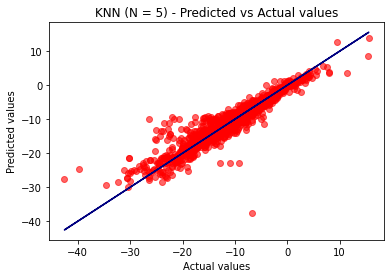

In [15]:
generatePredictionPlot(y_pred, y_test, "KNN (N = 5)")

In [16]:
knn3 = KNeighborsRegressor(n_neighbors = 3)
knn3.fit(X_train, y_train)
y_pred = knn3.predict(X_test)

In [17]:
printLosses(y_pred, y_test)

R2 Score on test set is :  0.972103524544895
Mean Squared Error on test set is :  0.5420056676809175
Mean Absolute Error on test set is :  0.24422260736114387
Root Mean Squared Error on test set is :  0.7362103420089381
Mean Absolute Percentage Error on test set is :  0.04643772174402375
Root Mean Squared Percentage Error on test set is :  0.33497218197220924


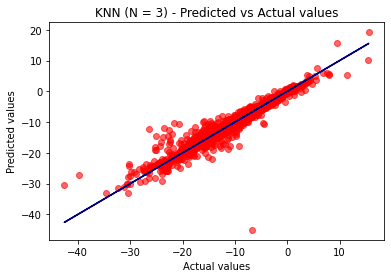

In [18]:
generatePredictionPlot(y_pred, y_test, "KNN (N = 3)")